# Using the Numpy Barycentric Interpolating Polynomial

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import barycentric_interpolate as pn

### Test the interpolating polynomial on an equispaced grid

In [2]:
# ********************************************
# Test function for the example below
def testf(x):
    return np.exp(np.sin(np.pi*x))

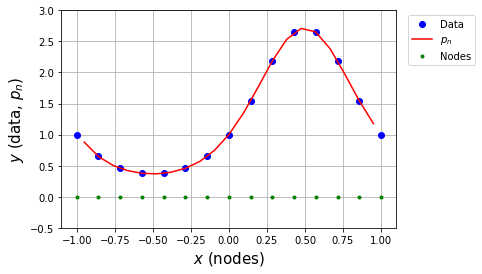

In [3]:
# ********************************************
# Set data for an example
# ********************************************
# Set the nodes and evaluate the test function
n = 15
x = np.linspace(-1,1,n)
y = testf(x)
# ********************************************
# Evaluate the interpolating polynomial on the
# equispaced interpolation grid
ni = 21
xi = np.linspace(-0.95,0.95,ni)
yi = pn(x,y,xi)
# ********************************************
# Display the results
plt.plot(x,y,'bo',xi,yi,'r-',x,x*0,'g.')
plt.ylim([-0.5,3])
plt.grid(True)
plt.xlabel('$x$ (nodes)',size=15)
plt.ylabel('$y$ (data, $p_n$)',size=15)
plt.legend(['Data','$p_n$','Nodes'],bbox_to_anchor=(1.25, 1));

### Interesting Result Regarding Interpolating Polynomials and Error

In [4]:
def cheb(n):
    k = np.arange(n+1)
    return np.cos((2*k+1)*np.pi/(2*n+2))

In [5]:
def runge(x):
    return 1/(1+(5*x)**2)

Max Absolute Error is 7.0702e-04


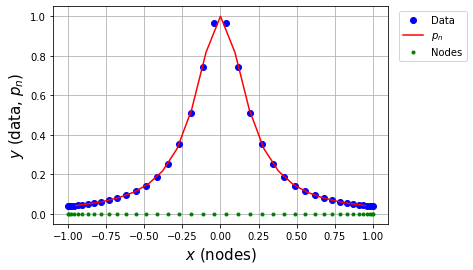

In [6]:
# ********************************************
# Set data for an example
# ********************************************
# Set the nodes and evaluate the test function
n = 39
#x = np.linspace(-1,1,n)
x = cheb(n)
y = runge(x)
# ********************************************
# Evaluate the interpolating polynomial on the
# equispaced interpolation grid
ni = 21
xi = np.linspace(-0.95,0.95,ni)
yi = pn(x,y,xi)
error = np.max(np.fabs(yi-runge(xi)))
print('Max Absolute Error is {:2.4e}'.format(error))
# ********************************************
# Display the results
plt.plot(x,y,'bo',xi,yi,'r-',x,x*0,'g.')
plt.grid(True)
plt.xlabel('$x$ (nodes)',size=15)
plt.ylabel('$y$ (data, $p_n$)',size=15)
plt.legend(['Data','$p_n$','Nodes'],bbox_to_anchor=(1.25, 1));

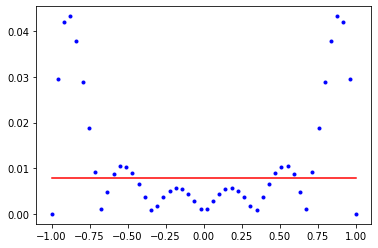

In [7]:
# Error and the cardinal function note
n = 7
L = 1/2**n
p = []
xk = np.linspace(-1,1,n)
#xk = cheb(n)
for x in np.linspace(-1,1):
    p.append(np.prod(np.fabs(x-xk)))
plt.plot(np.linspace(-1,1),p,'b.',[-1,1],[L,L],'r-') #What does the error term look like when you control it (How bad can it get?)

### Inverse Interpolation (HW 7 Problems 1 and 2)

zero is approximately 1.12341e-05


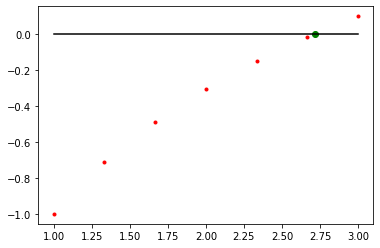

In [8]:
# Suppose we knew the answer and we want to understand the concept of inverse interpolation
x = np.linspace(1,3,7)
y = np.log(x)-1
z = pn(x,y,2.71828)
print('zero is approximately {:2.5e}'.format(z))
plt.plot(x,y,'r.',2.71828,z,'go',[1,3],[0,0],'k');

e is approximately 2.71831


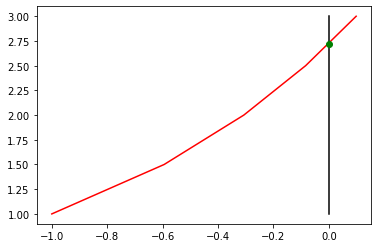

In [9]:
# Inverse interpolation
x = np.linspace(1,3,5)
y = np.log(x)-1
z = pn(y,x,0)
plt.plot(y,x,'r',[0,0],[1,3],'k',z,'go'); #reverse roles of x and y
print('e is approximately {:2.5f}'.format(z))

## Exercises

###### 1. Interpolate the given data using Numpy (see above) and plot the results. Use the given equispaced interpolation grid.

In [10]:
x = np.array([-1.2, -0.73, -0.01, 0.9, 2.5, 3.11, 5.7])
y = np.array([ 0.20797851, -0.15939311, -0.00688123, 0.83401657, 0.90014842, 0.05152535, -1.12407052])
xi = np.linspace(-1,5.5,9) # INTERPOLATION GRID

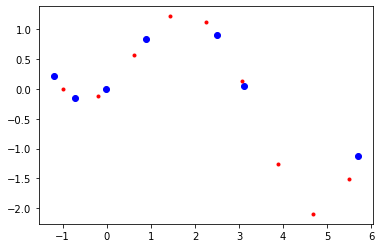

In [11]:
# PUT YOUR CODE HERE
plotable=pn(x,y,xi)
plt.plot(x,y,'bo',xi,plotable,'r.')

###### 2. Use inverse interpolation to estimate $\sqrt{2}$

In [12]:
# PUT YOUR CODE HERE
x = np.linspace(1,2,7) #May need to move x away from "vertical tangent lines" such is the case when x<=0 in this case
y = x**2-2
z = pn(y,x,0)
print('sqrt 2 is roughly {:2.5f}'.format(z))

sqrt 2 is roughly 1.41421


### Newton Divided Difference Tables (Extra Practice)

###### 3. Construct Newton's interpolation polynomial for the data shown and write the polynomial in nested form.

<table style="width:35%">
  <tr>
      <td>x</td><td>0</td><td>2</td><td>3</td><td>4</td>
  </tr>
  <tr>
      <td>y</td><td>7</td><td>11</td><td>28</td><td>63</td>
  </tr>
 </table>

###### 4. Find the missing values.

<table style="width:35%">
  <tr>
      <td>x</td><td>f[ ]</td><td>f[ , ]</td><td>f[ , , ]</td>
  </tr>
  <tr>
      <td>0.0</td><td>?</td>
  </tr>
  <tr>
  <td></td><td></td><td>?</td>
  </tr>
  <tr>
      <td>0.4</td><td>?</td><td></td><td>50/7</td>
  </tr>
   <tr>
      <td></td><td></td><td>10</td>
  </tr>
   <tr>
      <td>0.7</td><td>6</td>
  </tr>
</table>

###### 5. It is suspected that the polynomial used to produce the data in this table is not of degree 3. What is the degree? Use a Newton divided difference table to verify your answer.

<table style="width:35%">
  <tr>
      <td>x</td><td>0.5</td><td>1.0</td><td>1.5</td><td>2.0</td>
  </tr>
  <tr>
      <td>y</td><td>-3</td><td>-1</td><td>3</td><td>9</td>
  </tr>
 </table>

[back to top](#Using-the-Numpy-Barycentric-Interpolating-Polynomial)